In [1]:
import polars as pl
from plotnine import *

In [2]:
# read smf
smf = pl.read_csv('snakedata/smf.csv')
smf.shape, smf[:3]

((36, 6),
 shape: (3, 6)
 ┌───────────────┬───────────────────┬─────────────────┬───────────────┬──────────────────┬─────────┐
 │ sample        ┆ bacterial_archaea ┆ metagenome_size ┆ read_fraction ┆ average_bacteria ┆ warning │
 │ ---           ┆ l_bases           ┆ ---             ┆ ---           ┆ l_archaeal_genom ┆ ---     │
 │ str           ┆ ---               ┆ i64             ┆ f64           ┆ …                ┆ str     │
 │               ┆ i64               ┆                 ┆               ┆ ---              ┆         │
 │               ┆                   ┆                 ┆               ┆ i64              ┆         │
 ╞═══════════════╪═══════════════════╪═════════════════╪═══════════════╪══════════════════╪═════════╡
 │ SRR25008513_1 ┆ 3973762625        ┆ 6021804500      ┆ 65.99         ┆ 4543780          ┆ null    │
 │ SRR25008514_1 ┆ 3684352628        ┆ 5961286250      ┆ 61.8          ┆ 4529570          ┆ null    │
 │ SRR25008517_1 ┆ 4046347072        ┆ 6394085500      ┆ 

In [6]:
# read metadata
metadata = pl.read_csv('SraRunTable.csv')
metadata[:3]

Run,altitude,Assay Type,AvgSpotLen,Bases,BioProject,BioSample,BioSampleModel,Bytes,Center Name,Collection_Date,Consent,DATASTORE filetype,DATASTORE provider,DATASTORE region,Experiment,geo_loc_name_country,geo_loc_name_country_continent,geo_loc_name,Host,Instrument,isolation_source,lat_lon,LATITUDE,Library Name,LibraryLayout,LibrarySelection,LibrarySource,LONGITUDE,Organism,Platform,ReleaseDate,create_date,version,Sample Name,sample.name,SRA Study
str,f64,str,i64,i64,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,f64,i64,str,str,str,f64,str,str,str,str,i64,str,str,str
"""SRR25008513""",419.26225,"""WGS""",250,6021804500,"""PRJNA986291""","""SAMN35823439""","""Metagenome or …",2978650110,"""INSTITUTE OF M…","""2014-07-01""","""public""","""sra,fastq,run.…","""ncbi,s3,gs""","""gs.us-east1,nc…","""SRX20763924""","""uncalculated""","""uncalculated""","""not collected""","""not collected""","""Illumina HiSeq…","""not collected""","""not collected""",23.16,10,"""PAIRED""","""unspecified""","""METAGENOMIC""",112.51,"""soil metagenom…","""ILLUMINA""","""2023-06-23T00:…","""2023-06-23T20:…",1,"""DHS0808""","""DHS0808""","""SRP445548"""
"""SRR25008514""",804.9,"""WGS""",250,5961286250,"""PRJNA986291""","""SAMN35823438""","""Metagenome or …",3114392599,"""INSTITUTE OF M…","""2014-07-01""","""public""","""run.zq,fastq,s…","""gs,ncbi,s3""","""s3.us-east-1,n…","""SRX20763923""","""uncalculated""","""uncalculated""","""not collected""","""not collected""","""Illumina HiSeq…","""not collected""","""not collected""",42.2,9,"""PAIRED""","""unspecified""","""METAGENOMIC""",128.53,"""soil metagenom…","""ILLUMINA""","""2023-06-23T00:…","""2023-06-23T20:…",1,"""CB2424""","""CB2424""","""SRP445548"""
"""SRR25008515""",767.77,"""AMPLICON""",301,19169153,"""PRJNA986291""","""SAMN35823501""","""Metagenome or …",11351865,"""INSTITUTE OF M…","""2014-07-01""","""public""","""sra,fastq,run.…","""ncbi,gs,s3""","""gs.us-east1,nc…","""SRX20763922""","""uncalculated""","""uncalculated""","""not collected""","""not collected""","""Illumina MiSeq…","""not collected""","""not collected""",21.61,72,"""PAIRED""","""PCR""","""METAGENOMIC""",101.58,"""soil metagenom…","""ILLUMINA""","""2023-06-23T00:…","""2023-06-23T20:…",1,"""S125""","""XS2022""","""SRP445548"""


In [4]:
# read pH
ph = pl.read_csv('Fig.2.csv')
ph[:3]

sample_name,pH,Average Genome Size (Mbp),GC Content (%),Average 16S Copy Number,Minimal Doubling Time (h),site.latitude
str,f64,f64,f64,f64,f64,str
"""BD1203""",3.94,5.880448,61.15,10.278868,3.454081,"""BDGS"""
"""BD1512""",4.14,5.667547,60.89,5.93146,2.576562,"""BDGS"""
"""BD1623""",4.31,4.394126,61.96,9.816843,2.403498,"""BDGS"""


In [7]:
smf = smf.with_columns(pl.col('sample').str.replace('_1','').alias('Run'))
smf[:3]
# metadata.select(['Run','sample.name']).join(smf, lefton='Run', how='inner').join(ph, on='sample.name

sample,bacterial_archaeal_bases,metagenome_size,read_fraction,average_bacterial_archaeal_genome_size,warning,Run
str,i64,i64,f64,i64,str,str
"""SRR25008513_1""",3973762625,6021804500,65.99,4543780,null,"""SRR25008513"""
"""SRR25008514_1""",3684352628,5961286250,61.8,4529570,null,"""SRR25008514"""
"""SRR25008517_1""",4046347072,6394085500,63.28,4632232,null,"""SRR25008517"""


In [8]:
smfm = metadata.select(['Run','sample.name']).join(smf, on='Run', how='inner')
smfm.shape, smfm[:3]

((36, 8),
 shape: (3, 8)
 ┌────────────┬────────────┬────────────┬────────────┬────────────┬───────────┬───────────┬─────────┐
 │ Run        ┆ sample.nam ┆ sample     ┆ bacterial_ ┆ metagenome ┆ read_frac ┆ average_b ┆ warning │
 │ ---        ┆ e          ┆ ---        ┆ archaeal_b ┆ _size      ┆ tion      ┆ acterial_ ┆ ---     │
 │ str        ┆ ---        ┆ str        ┆ ases       ┆ ---        ┆ ---       ┆ archaeal_ ┆ str     │
 │            ┆ str        ┆            ┆ ---        ┆ i64        ┆ f64       ┆ genom…    ┆         │
 │            ┆            ┆            ┆ i64        ┆            ┆           ┆ ---       ┆         │
 │            ┆            ┆            ┆            ┆            ┆           ┆ i64       ┆         │
 ╞════════════╪════════════╪════════════╪════════════╪════════════╪═══════════╪═══════════╪═════════╡
 │ SRR2500851 ┆ DHS0808    ┆ SRR2500851 ┆ 3973762625 ┆ 6021804500 ┆ 65.99     ┆ 4543780   ┆ null    │
 │ 3          ┆            ┆ 3_1        ┆            ┆   

In [9]:
m = smfm.join(ph, left_on='sample.name', right_on='sample_name', how='inner')
m.shape, m[:3]

((36, 14),
 shape: (3, 14)
 ┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
 │ Run       ┆ sample.na ┆ sample    ┆ bacterial ┆ … ┆ GC        ┆ Average   ┆ Minimal   ┆ site.lat │
 │ ---       ┆ me        ┆ ---       ┆ _archaeal ┆   ┆ Content   ┆ 16S Copy  ┆ Doubling  ┆ itude    │
 │ str       ┆ ---       ┆ str       ┆ _bases    ┆   ┆ (%)       ┆ Number    ┆ Time (h)  ┆ ---      │
 │           ┆ str       ┆           ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ str      │
 │           ┆           ┆           ┆ i64       ┆   ┆ f64       ┆ f64       ┆ f64       ┆          │
 ╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
 │ SRR250085 ┆ BD1203    ┆ SRR250085 ┆ 445542173 ┆ … ┆ 61.15     ┆ 10.278868 ┆ 3.454081  ┆ BDGS     │
 │ 84        ┆           ┆ 84_1      ┆ 1         ┆   ┆           ┆           ┆           ┆          │
 │ SRR250085 ┆ BD1512    ┆ SRR250085 ┆ 417078324 ┆ … ┆ 

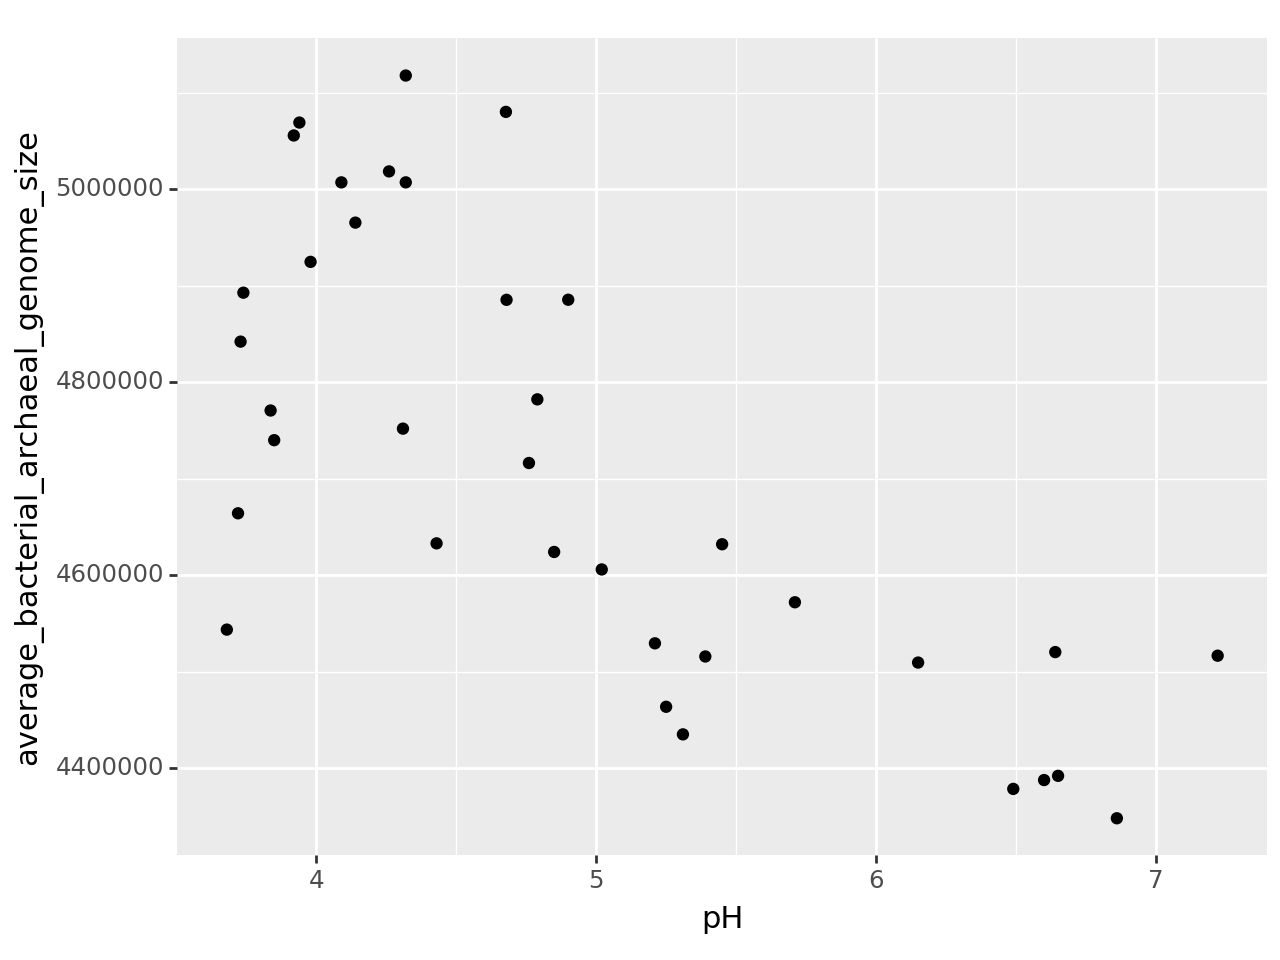

<Figure Size: (640 x 480)>

In [12]:
ggplot(m.to_pandas()) + geom_point(aes(x='pH', y='average_bacterial_archaeal_genome_size'))